In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [122]:
weak = pd.read_csv('tree.csv')
lb = pd.read_csv('tree_load_balance.csv')

rusty_tree_weak = weak[weak['software'] == 'rusty_tree']
rusty_tree_weak_py = weak[weak['software'] == 'rusty_tree_py']

dendro_weak = weak[weak['software'] == 'dendro']

rusty_lb = lb[lb['software'] == 'rusty_tree']

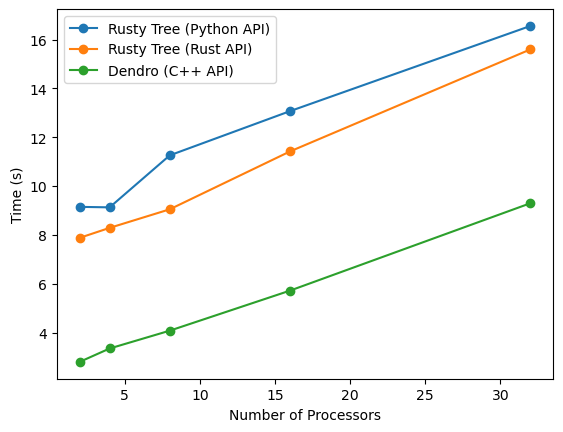

In [123]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of Processors")
ax.set_ylabel("Time (s)")
ax.plot(rusty_tree_weak_py['nprocs'], rusty_tree_weak_py['time'], '-o', label='Rusty Tree (Python API)')
ax.plot(rusty_tree_weak['nprocs'], rusty_tree_weak['time'], '-o', label='Rusty Tree (Rust API)')
ax.plot(dendro_weak['nprocs'], dendro_weak['time'], '-o', label='Dendro (C++ API)')
ax.legend()
plt.savefig('../../images/ch_2/tree_weak_scaling.pdf', dpi=10000, format='pdf')

In [134]:
np.array(rusty_tree_weak_py['time'] - np.array(rusty_tree_weak['time']))/(np.array(rusty_tree_weak['time']))*100

array([ 6.15384615, 14.44833625, 24.4198895 , 10.13268999, 16.11675127])

In [128]:
rusty_tree_weak['time']

5    15.60
6    11.42
7     9.05
8     8.29
9     7.88
Name: time, dtype: float64

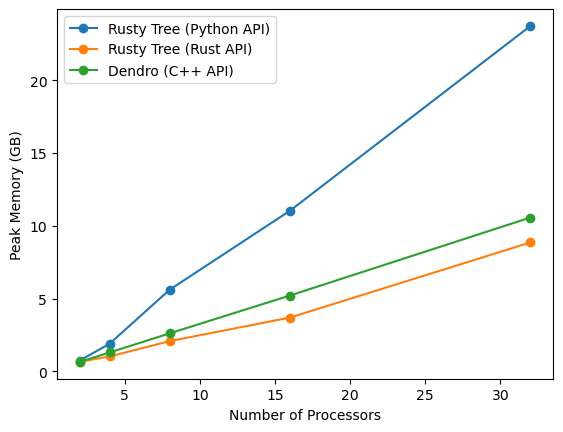

In [124]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of Processors")
ax.set_ylabel("Peak Memory (GB)")
ax.plot(rusty_tree_weak_py['nprocs'], rusty_tree_weak_py['nprocs']*rusty_tree_weak_py['memory']*1e-6, '-o', label='Rusty Tree (Python API)')
ax.plot(rusty_tree_weak['nprocs'], rusty_tree_weak['nprocs']*rusty_tree_weak['memory']*1e-6, '-o', label='Rusty Tree (Rust API)')
ax.plot(dendro_weak['nprocs'], dendro_weak['nprocs']*dendro_weak['memory']*1e-6, '-o', label='Dendro (C++ API)')
ax.legend()
plt.savefig('../../images/ch_2/tree_weak_scaling_mem.pdf', dpi=10000, format='pdf')

In [125]:
wt = rusty_lb[rusty_lb['geometry'] == 'wiggly_torus']
ru = rusty_lb[rusty_lb['geometry'] == 'uniform_random']

In [85]:
wt[wt['nprocs'] == 2]['mean_deviation'].mean()

5.179897662427386

In [86]:
nvec = [2, 4, 8, 16, 32]
mean_deviation_wt = []
std_deviation_wt = []
mean_deviation_ur = []
std_deviation_ur = []
for n in nvec:
    mean_deviation_wt.append(wt[wt['nprocs'] == n]['mean_deviation'].mean())
    std_deviation_wt.append(wt[wt['nprocs'] == n]['mean_deviation'].std())
    mean_deviation_ur.append(lb[lb['nprocs'] == n]['mean_deviation'].mean())
    std_deviation_ur.append(lb[lb['nprocs'] == n]['mean_deviation'].std())

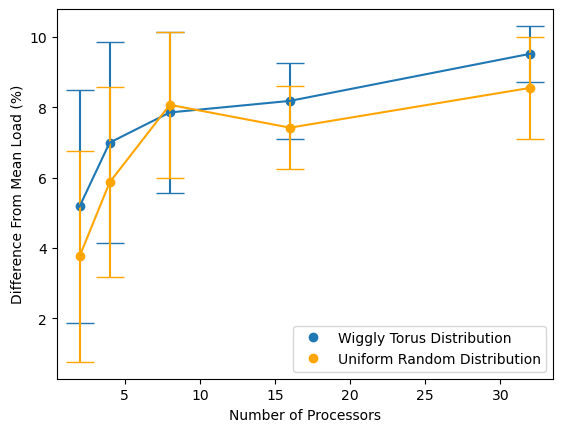

In [108]:
fig, ax = plt.subplots()

ax.set_ylabel('Difference From Mean Load (%)')
ax.set_xlabel('Number of Processors')
ax.plot(nvec, mean_deviation_wt, 'o', color='#1f77b4', label='Wiggly Torus Distribution')
ax.errorbar(nvec, mean_deviation_wt, yerr=std_deviation_wt, color='#1f77b4', capsize=10)
ax.plot(nvec, mean_deviation_ur, 'o', color='orange', label='Uniform Random Distribution')
ax.errorbar(nvec, mean_deviation_ur, yerr=std_deviation_ur, capsize=10, color='orange')
ax.legend()
plt.savefig('../../images/ch_2/load_balance.pdf', dpi=10000, format='pdf')


In [215]:
df = pd.read_csv('breakdown.csv')
df2 = pd.read_csv('breakdown_balanced.csv')

In [216]:
df2.head()

,rank,local_balance,hashmaps2,linearise2,parallel_sort_2
0,0,13,1352,140,1515
1,3,14,1385,151,906
2,2,14,1528,156,866
3,1,14,1584,162,811


In [196]:
df.head(10)

,balanced,rank,morton_encode,parallel_sort,linearize_complete_local,complete_blocktree,transfer_points,hashmaps,local_sort
0,0,0,9,108,531,0,97,4993,0
1,0,3,9,134,538,0,17,5595,0
2,0,2,9,134,579,0,26,5672,0
3,0,1,9,108,501,103,25,5677,0
4,1,0,10,104,523,0,118,4983,0
5,1,3,9,129,547,0,70,5591,0
6,1,2,9,129,589,0,30,5629,0
7,1,1,9,104,483,131,29,5684,0


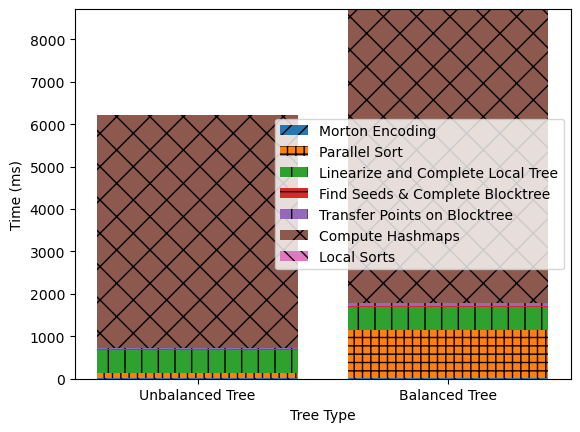

In [223]:
unbalanced = df[df['balanced']==0]
balanced = df[df['balanced']==1]
fig, ax = plt.subplots()
patterns = [ "//" , "++" , "|" , "-" , "+" , "x", "\\\\", "||||" ]
xvalues = ['Unbalanced Tree', 'Balanced Tree']

plt.bar(xvalues, [unbalanced['morton_encode'].mean(), balanced['morton_encode'].mean()], label='Morton Encoding', hatch=patterns[0], alpha=.99)
bottom = np.array([unbalanced['morton_encode'].mean(), balanced['morton_encode'].mean()])
plt.bar(xvalues, [unbalanced['parallel_sort'].mean(), balanced['parallel_sort'].mean()+df2['parallel_sort_2'].mean()], label='Parallel Sort', hatch=patterns[1], alpha=.99, bottom=bottom)
bottom += np.array([unbalanced['parallel_sort'].mean(), balanced['parallel_sort'].mean()+df2['parallel_sort_2'].mean()])
plt.bar(xvalues, [unbalanced['linearize_complete_local'].mean(), balanced['linearize_complete_local'].mean()], label='Linearize and Complete Local Tree', hatch=patterns[2], alpha=.99, bottom=bottom)
bottom += np.array([unbalanced['linearize_complete_local'].mean(), balanced['linearize_complete_local'].mean()])
plt.bar(xvalues, [unbalanced['complete_blocktree'].mean(), balanced['complete_blocktree'].mean()], label='Find Seeds & Complete Blocktree', hatch=patterns[3], alpha=.99, bottom=bottom)
bottom += np.array([unbalanced['complete_blocktree'].mean(), balanced['complete_blocktree'].mean()])
plt.bar(xvalues, [unbalanced['transfer_points'].mean(),balanced['transfer_points'].mean()], label='Transfer Points on Blocktree', hatch=patterns[4], alpha=.99, bottom=bottom)
bottom += np.array([unbalanced['transfer_points'].mean(),balanced['transfer_points'].mean()])
plt.bar(xvalues, [unbalanced['hashmaps'].mean(),balanced['hashmaps'].mean()+df2['hashmaps2'].mean()], label='Compute Hashmaps', hatch=patterns[5], alpha=.99, bottom=bottom)
bottom += np.array([unbalanced['hashmaps'].mean(),balanced['hashmaps'].mean()+df2['hashmaps2'].mean()])
plt.bar(xvalues, [unbalanced['local_sort'].mean(), balanced['local_sort'].mean()], label='Local Sorts', hatch=patterns[6], alpha=.99, bottom=bottom)

ax.legend(loc="best")
ax.set_xlabel('Tree Type')
ax.set_ylabel('Time (ms)')
plt.savefig('../../images/ch_2/breakdown.pdf', dpi=10000, format='pdf')

plt.show()